# Artificial Neural Network with Numpy

## Step 1: Load the data

We create some data. 

In [1]:
import numpy as np
from numpy import zeros
from numpy import ones
import matplotlib.pyplot as plt

In [2]:
D = 2 

X1 = np.random.randn(500,D) + np.array([0,-4])
X2 = np.random.randn(500,D) + np.array([4,-4])
X3 = np.random.randn(500,D) + np.array([2,0])
X = np.concatenate((X1,X2,X3), axis = 0)

y1 = np.zeros(500)
y2 = np.ones(500)
y3 = 2 * np.ones(500) 
y = np.concatenate((y1,y2,y3), axis = 0)

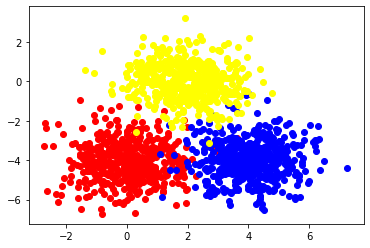

In [3]:
plt.scatter(X1[:,0], X1[:,1], color = 'red')
plt.scatter(X2[:,0], X2[:,1], color = 'blue')
plt.scatter(X3[:,0], X3[:,1], color = 'yellow')
plt.show()

## Step 2: Build the model

$N = 1500$ is the total number of samples.  
$D= 2$ is the dimension of input.  
$M = 4$ is the dimension of hidden layer.   
$K = 3$ is the number of classes.    

If $X = \langle x_1, x_2 \rangle$ is an input, then we have a $D \times M$ matrix $W = \left[
\begin{array}{cc}
w_{11} & w_{12} & w_{13} & w_{14} \\
w_{21} & w_{22} & w_{23} & w_{24} \\
\end{array}
\right]$ from input layer to hidden layer. 

$$ 
W^TX + b = 
\left[
\begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23} \\
w_{14} & w_{24}
\end{array}
\right]
\left[
\begin{array}{c}
x_{1} \\
x_{2} 
\end{array}
\right]
+ 
\left[ 
\begin{array}{c}
b_1 \\
b_2 \\
b_3 \\
b_4 
\end{array}
\right]
$$

Note $W^T$ is $4 \times 2$ matrix.  $X$ is $2 \times 1$ matrix.  The matrix multiplication $W^TX$ can be done in code by $W.T.dot(X)$.  The result will be $ 4 \times 1$ matrix.

Now apply activation function $Z = \sigma(W^TX + b)$.  Activation function could be Relu, sigmoid, tanh, etc.   

Now, $Z = \langle z_1, z_2, z_3, z_4 \rangle$.  We have $M \times K$ matrix $V = \left[
\begin{array}{cc}
v_{11} & v_{12} & v_{13}  \\
v_{21} & v_{22} & v_{23}\\
v_{31} & v_{32} & v_{33}\\
v_{41} & v_{42} & v_{43}\\
\end{array}
\right]
$
from hidden layer to output layer.
$$ 
V^TZ + c = 
\left[
\begin{array}{cccc}
v_{11} & v_{21} & v_{31} & v_{41}\\
v_{12} & v_{22} & v_{32} & v_{42}\\
v_{13} & v_{23} & v_{33} & v_{43}\\
\end{array}
\right]
\left[
\begin{array}{c}
z_{1} \\
z_{2} \\
z_{3} \\
z_{4}
\end{array}
\right]
+ 
\left[ 
\begin{array}{c}
c_1 \\
c_2 \\
c_3 \\
\end{array}
\right]
$$

We have $\hat{y} = softmax(V^TZ +c)$, where $$ softmax(X)_j = \frac{ e^{x_j}}{\sum_{k=1}^K e^{x_k}}, \text{ where $X$ is $K$-dimensional vector}$$

Then change output of softmax function $\hat{y}$ into hot encoding.  For example, $\hat{y} = [0.2, 0.3, 0.5] \rightarrow P= argmax\{\hat{y}\} = argmax\{[0.2, 0.3, 0.5]\} = [0,0,1]$.  Now we have the prediction. 

#### Loss function

The loss function is $\textbf{categorical cross entropy function}$, 

$$
J = -\sum_{n=1}^N \sum_{k=1}^K y_{nk} \log \hat{y}_{nk}
$$

Remember we need to find $W, b, V, c$ to maximize $J$.  

Now, derivatives are 
$$ 
\frac{\partial J}{\partial W_{dm}} = -\sum_{n=1}^N \sum_{k=1}^K (y_{nk} - \hat{y}_{nk})V Z_{nm}(1-Z_{nm})X_{nd}
$$

$$
\frac{\partial J}{\partial b_m} = -\sum_{n=1}^N \sum_{k=1}^K (y_{nk} - \hat{y}_{nk})V Z_{nm}(1-Z_{nm})
$$

$$
\frac{\partial J}{\partial V_{mk}} = -\sum_{n=1}^N (y_{nk} - \hat{y}_{nk})Z_{nm}
$$

$$
\frac{\partial J}{\partial c_{k}} = -\sum_{n=1}^N (y_{nk} - \hat{y}_{nk}) 
$$

Run gradient descent to find optimal $W, b, V, c$.  Note we used sigmoid and softmax, respectively as activation function.  If we used relu tanh, then derivatives look different.  

## Step 2: Build the model

In [4]:
K = 3

In [5]:
def sigmoid(p):
    sig = 1/(1+np.exp(-p))
    return sig

In [6]:
def softmax(A):
    for i in range(len(A)):
        A[i] = np.exp(A[i])/sum(np.exp(A[i]))
    return A

In [7]:
def one_key_hotcoding(y):
    T = []

    for i in range(len(y)):
        if y[i] == 0:
            T.append([1,0,0])
        elif y[i] == 1:
            T.append([0,1,0])
        else:
            T.append([0,0,1])
    return T

In [8]:
def model(X,y,M):
        
    W = np.random.randn(D,M)
    b = np.random.randn(M)
    V = np.random.randn(M,K)
    c = np.random.randn(K)

    epochs = 1000
    lr = 0.001

    T = one_key_hotcoding(y)
    
    for i in range(epochs):
        Z = sigmoid(X.dot(W)+b)
        yhat = softmax(Z.dot(V)+c)

        JV = -Z.T.dot(T - yhat)
        Jc = -(T-yhat).sum(axis = 0)
        JW = -X.T.dot((T-yhat).dot(V.T)*Z*(1-Z))
        Jb = -((T-yhat).dot(V.T)*Z*(1-Z)).sum(axis = 0)

        V = V - lr * JV
        c = c - lr * Jc    
        W = W - lr * JW
        b = b - lr * Jb
        
    return W,b,V,c, yhat

## Step 3: Train model

In [9]:
W, b, V, c, yhat = model(X,y,4)

## Step 4: Evaluate the model

In [10]:
print("W is", W)
print("b is", b)
print("V is", V)
print("c is", c)

W is [[ 0.48001742 -1.0098624   2.34404479 -0.05287475]
 [-1.70609067  0.38055851  1.13226498  1.59687657]]
b is [0.53001941 3.58688756 0.41913065 3.31708499]
V is [[ 1.45957723  0.96147297 -1.63472752]
 [ 3.41197653 -4.96629193  1.42322591]
 [-3.75166318  2.53486155  1.68204371]
 [-2.33000244 -2.75800165  6.57489073]]
c is [ 0.79651767  1.76313896 -2.62172524]


In [12]:
P = np.argmax(yhat, axis = 1)

correct = 0

for i in range(len(y)):
    if y[i] == P[i]:
        correct += 1
        
print("Accuracy is", correct/float(len(y)) * 100)

Accuracy is 97.53333333333333


## Step 5: Make a prediction

Let's select a random point (1,2). 

In [13]:
S = np.array([1,2])

B = sigmoid(S.dot(W)+b).dot(V) + c
yhat = np.array([np.exp(B[0]), np.exp(B[1]), np.exp(B[2])])/sum(np.exp(B))

In [14]:
print("predicted output is", np.argmax(yhat))

predicted output is 2
